In [4]:
import numpy as np 
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime
import boto3
import io

In [5]:
s3=boto3.client("s3")
bucket_name="hao-topic"
obj=s3.get_object(Bucket=bucket_name,Key="taiwan_data.csv")
initial_df=pd.read_csv(io.BytesIO(obj["Body"].read()))

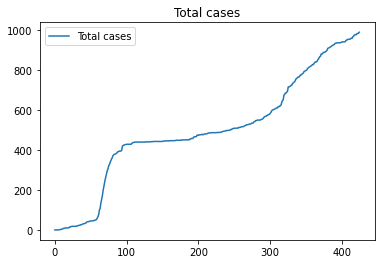

In [7]:
initial_df[['Total cases']].plot()
plt.title("Total cases")
plt.show()

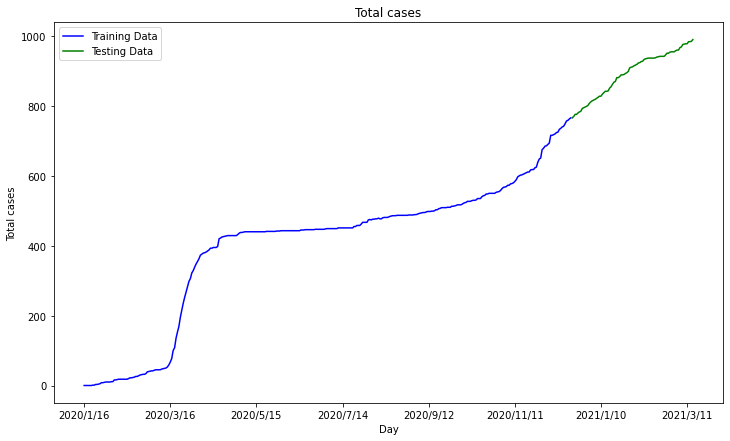

In [11]:
train_data, test_data = initial_df[0:int(len(initial_df)*0.8)], initial_df[int(len(initial_df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Total cases')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.plot(train_data['Total cases'], 'blue', label='Training Data')
plt.plot(test_data['Total cases'], 'green', label='Testing Data')
plt.xticks(np.arange(0,425,60), initial_df['Day'][0:425:60])
plt.legend()

In [12]:
train_ar = train_data['Total cases'].values #轉成numpy.array
test_ar = test_data['Total cases'].values
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions) #均方誤差（Mean Square Error）
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions) #對稱平均絕對百分比誤差（Symmetric Mean Absolute Percentage Error）
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 6.550
Symmetric mean absolute percentage error: 8.381


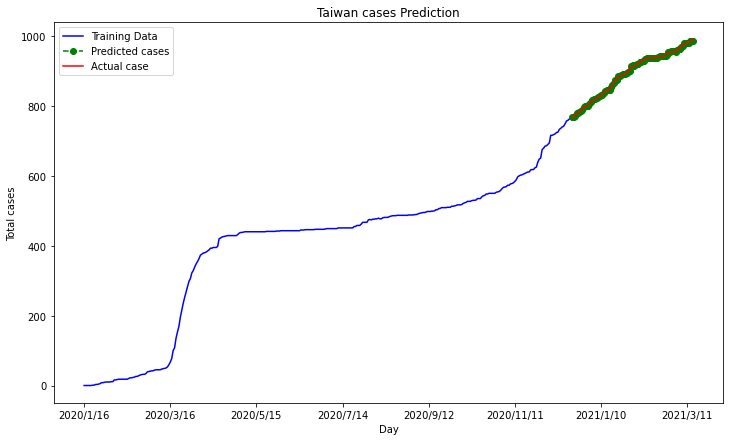

In [21]:
plt.figure(figsize=(12,7))
plt.plot(initial_df['Total cases'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted cases')
plt.plot(test_data.index, test_data['Total cases'], color='red', label='Actual case')
plt.title('Taiwan cases Prediction')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.xticks(np.arange(0,425, 60), initial_df['Day'][0:425:60])
plt.legend()

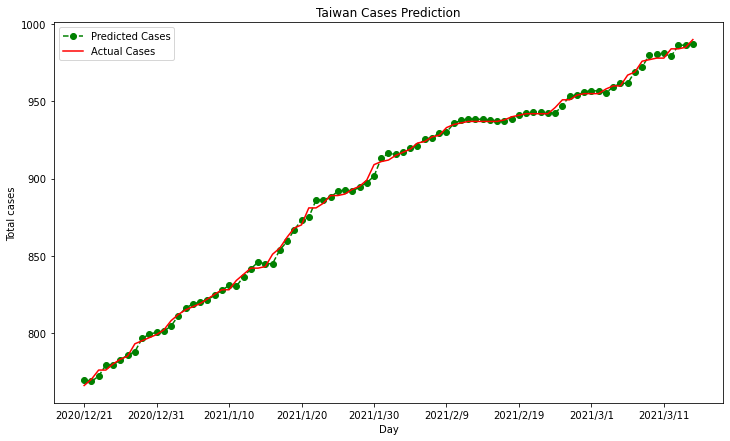

In [25]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Cases')
plt.plot(test_data.index, test_data['Total cases'], color='red', label='Actual Cases')
plt.xticks(np.arange(340,425, 10), initial_df['Day'][340:425:10])
plt.title('Taiwan Cases Prediction')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.legend()